In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plt.style.use('seaborn')
# sns.set_palette('husl')

crime_df = pd.read_csv('../data/crime_district.csv')
income_df = pd.read_csv('../data/hh_income_state.csv')
poverty_df = pd.read_csv('../data/hh_poverty_state.csv')
labor_df = pd.read_csv('../data/lfs_state_sex.csv')

crime_df = crime_df[(crime_df['district'] != 'All') & (crime_df['state'] != 'Malaysia') & (crime_df['type'] != 'all')]

for df in [crime_df, income_df, labor_df, poverty_df] :
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

## Calculate total crimes by district

Top 10 Districts with Highest Crime Rates:
state              district           
Selangor           Petaling Jaya          23078
W.P. Kuala Lumpur  Dang Wangi             19980
Selangor           Kajang                 19250
                   Gombak                 19058
W.P. Kuala Lumpur  Sentul                 16456
Johor              Johor Bahru Selatan    16022
Selangor           Ampang Jaya            15693
W.P. Kuala Lumpur  Wangsa Maju            14965
Selangor           Klang Selatan          13850
Melaka             Melaka Tengah          13765
Name: crimes, dtype: int64


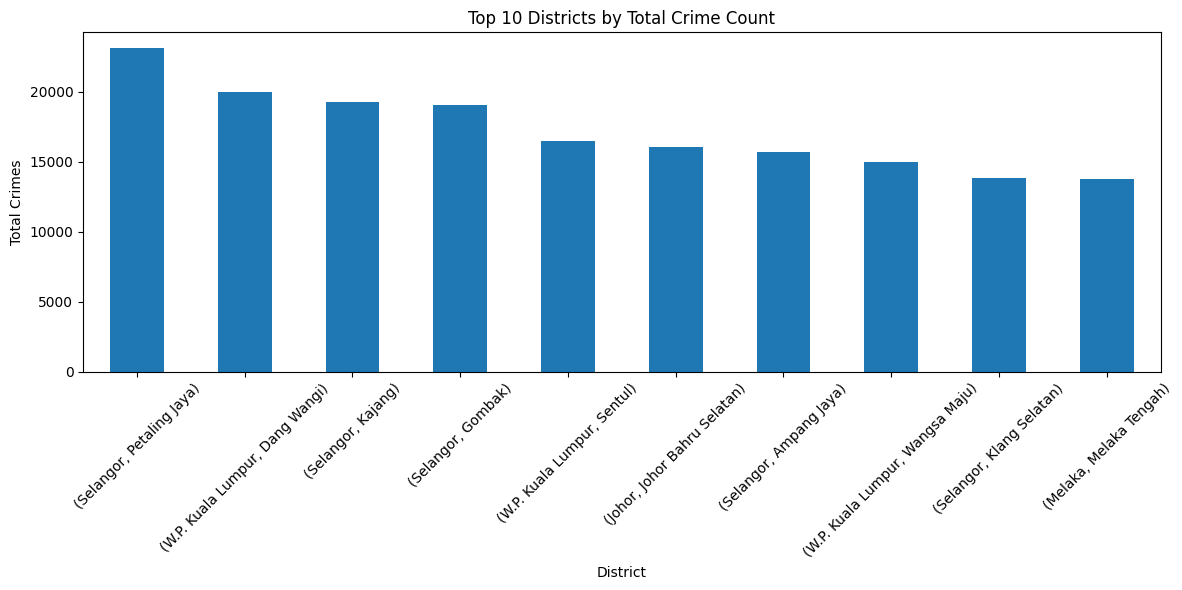

In [42]:
district_crimes = crime_df.groupby(['state', 'district'])['crimes'].sum().sort_values(ascending=False)
print("Top 10 Districts with Highest Crime Rates:")
print(district_crimes.head(10))


plt.figure(figsize=(12, 6))
district_crimes.head(10).plot(kind='bar')
plt.title('Top 10 Districts by Total Crime Count')
plt.xlabel('District')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/top_districts.png')
plt.show()
plt.close()




Crime Type Distribution by District (First 5 District)
type                       break_in  causing_injury  murder  rape  \
state district                                                      
Johor Batu Pahat                864             255      22   160   
      Iskandar Puteri           540             279      20    67   
      Johor Bahru Selatan      2003             831      81   201   
      Johor Bahru Utara        1379             720      32   151   
      Kluang                    408             352      20   147   

type                       robbery_gang_armed  robbery_gang_unarmed  \
state district                                                        
Johor Batu Pahat                            1                   235   
      Iskandar Puteri                       1                   350   
      Johor Bahru Selatan                   6                  1684   
      Johor Bahru Utara                     2                  1019   
      Kluang                      

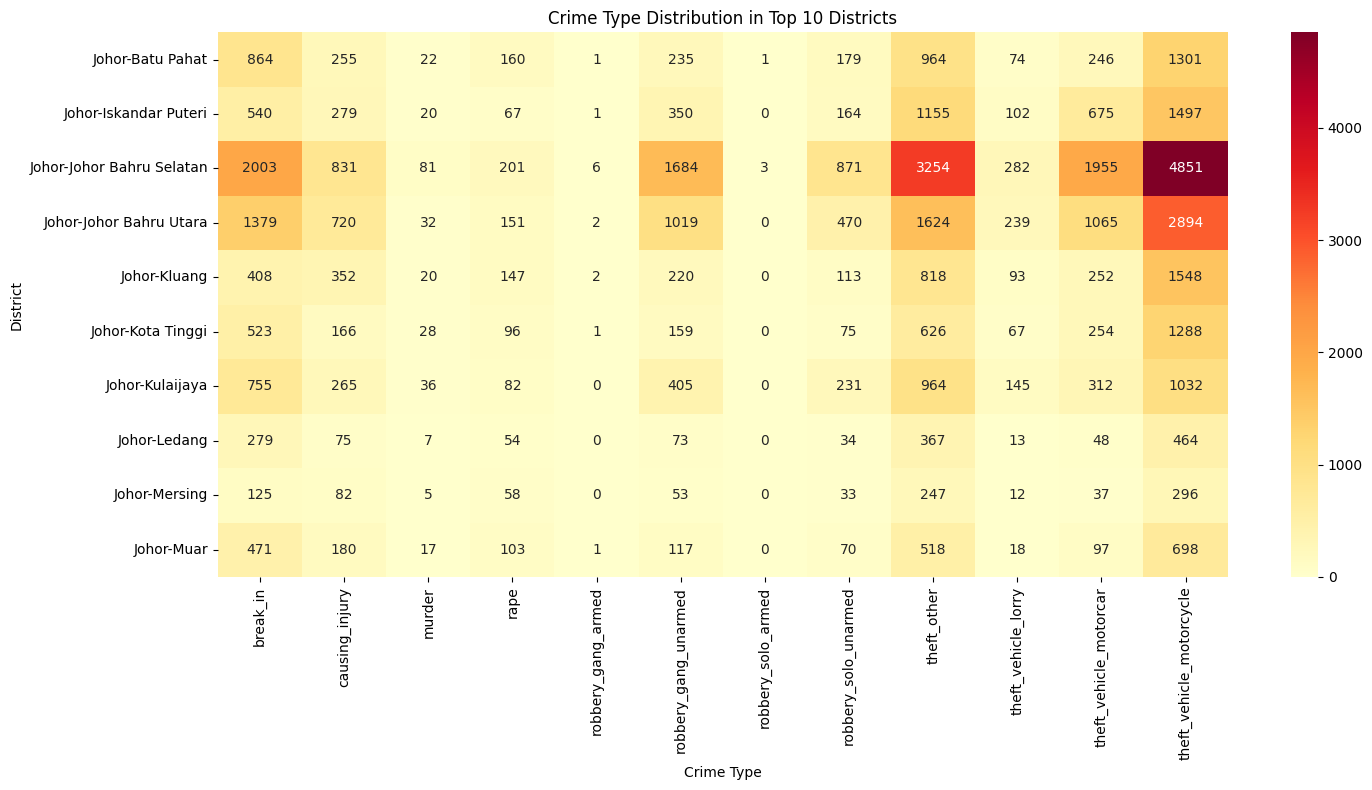

In [43]:
crime_types_district = crime_df.pivot_table(
    index=['state', 'district'],
    columns='type',
    values='crimes',
    aggfunc='sum'
).fillna(0)

print("\nCrime Type Distribution by District (First 5 District)")
print(crime_types_district.head())

# Crime Type Distribution Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(crime_types_district.head(10), annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Crime Type Distribution in Top 10 Districts')
plt.xlabel('Crime Type')
plt.ylabel('District')
plt.tight_layout()
plt.savefig('../results/crime_types_pie.png')
plt.show()
plt.close()

### Analyze income and poverty relationship


State-level Socioeconomic Metrics:
                   avg_income  avg_poverty  unemployment_rate
state                                                        
Johor                 3301.19         8.05               3.36
Kedah                 2235.86        19.66               3.98
Kelantan              1952.67        23.76               4.04
Melaka                3175.95         9.10               2.70
Negeri Sembilan       2886.19         9.50               3.73
Pahang                2417.43        10.18               3.45
Perak                 2369.81        13.16               4.31
Perlis                2221.81        19.08               4.03
Pulau Pinang          3442.05         7.79               2.69
Sabah                 2851.58        23.45               6.15
Sarawak               2975.95        14.98               5.23
Selangor              4731.71         5.51               2.98
Terengganu            2495.86        21.16               4.85
W.P. Kuala Lumpur     6179.61     

C:\Users\C00484\AppData\Local\Temp\ipykernel_33496\2884163770.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(state, (state_metrics['avg_income'][i], state_metrics['avg_poverty'][i]))


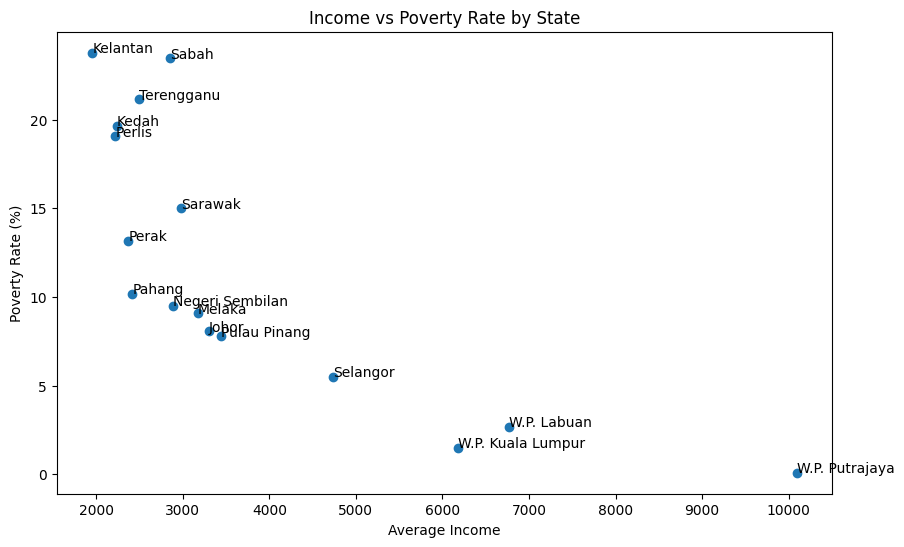

In [45]:
state_metrics = pd.DataFrame()
state_metrics['avg_income'] = income_df.groupby('state')['income_mean'].mean()
state_metrics['avg_poverty'] = poverty_df.groupby('state')['poverty_absolute'].mean()
state_metrics['unemployment_rate'] = labor_df.groupby('state')['u_rate'].mean()



print("\nState-level Socioeconomic Metrics:")
print(state_metrics.round(2))

plt.figure(figsize=(10, 6))
plt.scatter(state_metrics['avg_income'], state_metrics['avg_poverty'])
for i, state in enumerate(state_metrics.index):
    plt.annotate(state, (state_metrics['avg_income'][i], state_metrics['avg_poverty'][i]))
plt.title('Income vs Poverty Rate by State')
plt.xlabel('Average Income')
plt.ylabel('Poverty Rate (%)')
plt.savefig('../results/income_poverty_scatter.png')
plt.show()
plt.close()



Correlations between socioeconomic factors:
                   avg_income  avg_poverty  unemployment_rate
avg_income               1.00        -0.77              -0.45
avg_poverty             -0.77         1.00               0.60
unemployment_rate       -0.45         0.60               1.00


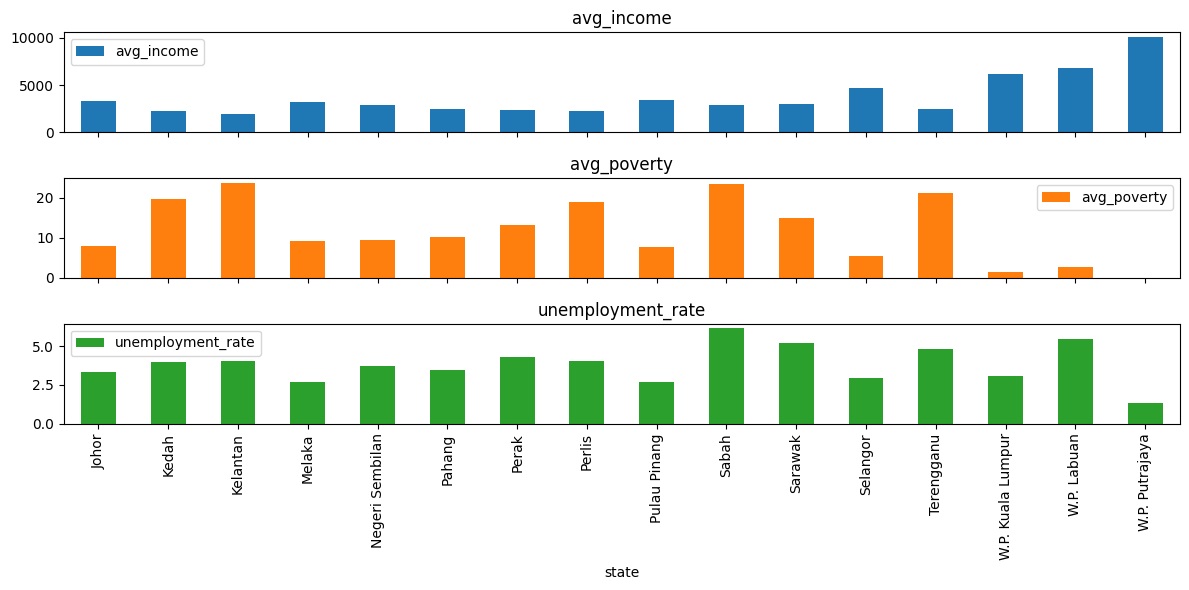

In [30]:
# Calculate correlations between metrics
print("\nCorrelations between socioeconomic factors:")
print(state_metrics.corr().round(2))

state_metrics.plot(kind='bar', figsize=(12, 6), subplots=True, layout=(3,1))
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

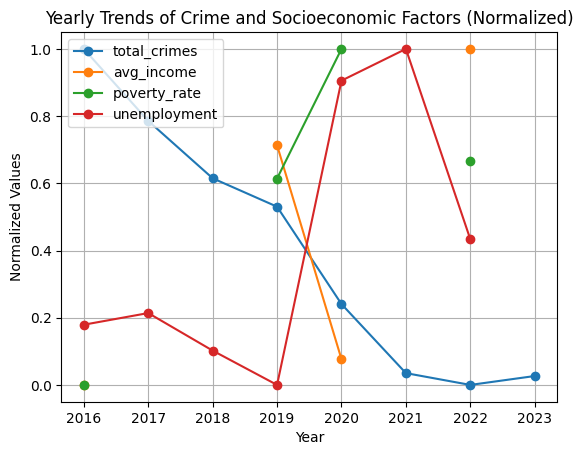

In [48]:

# 4. Time Trends Analysis
yearly_metrics = pd.DataFrame()
yearly_metrics['total_crimes'] = crime_df.groupby('year')['crimes'].sum()
yearly_metrics['avg_income'] = income_df.groupby('year')['income_mean'].mean()
yearly_metrics['poverty_rate'] = poverty_df.groupby('year')['poverty_absolute'].mean()
yearly_metrics['unemployment'] = labor_df.groupby('year')['u_rate'].mean()

# Normalize data for comparison
normalized_metrics = yearly_metrics.copy()
for column in normalized_metrics.columns:
    normalized_metrics[column] = (normalized_metrics[column] - normalized_metrics[column].min()) / \
                               (normalized_metrics[column].max() - normalized_metrics[column].min())

plt.figure(figsize=(12, 6))
normalized_metrics.plot(marker='o')
plt.title('Yearly Trends of Crime and Socioeconomic Factors (Normalized)')
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.grid(True)
plt.savefig('../results/yearly_trends.png')
plt.show()
plt.close()

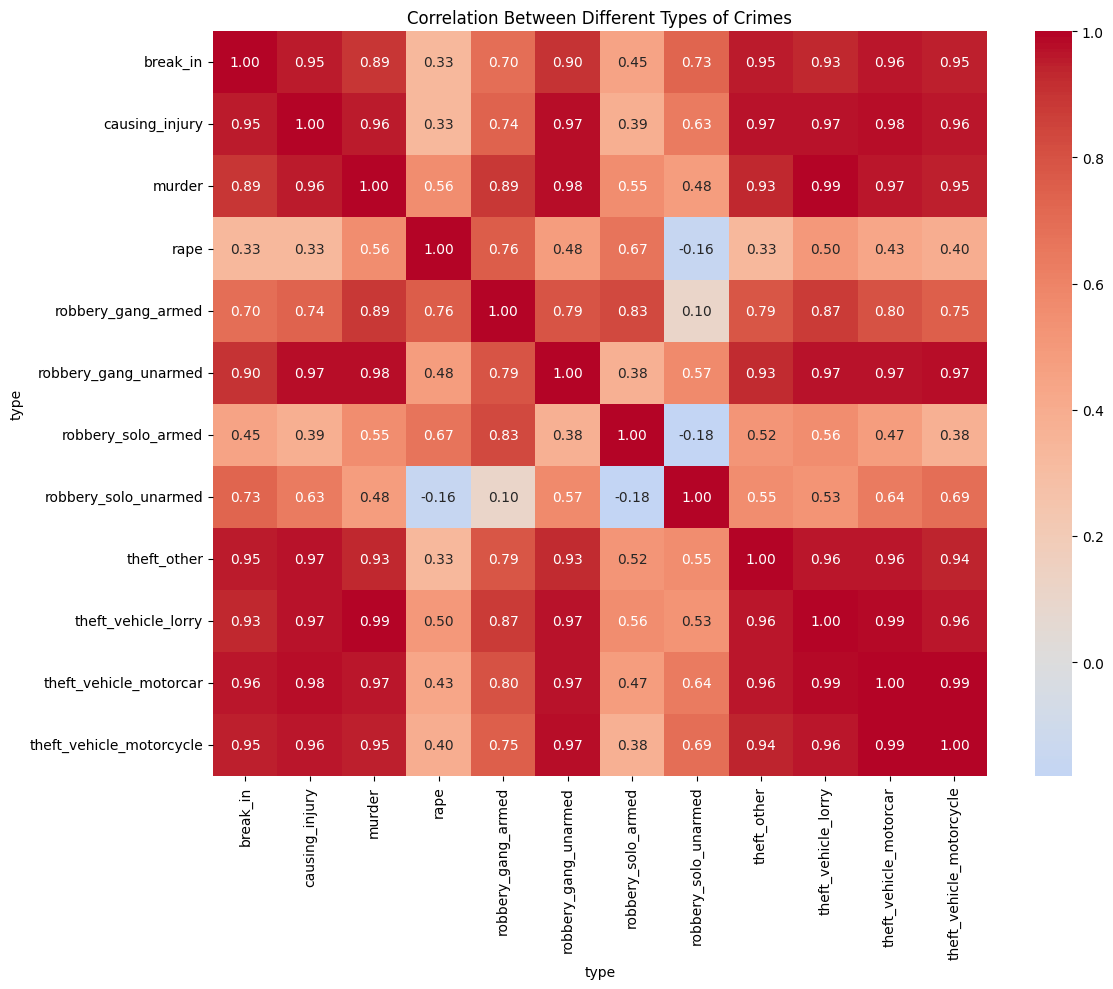

In [49]:
# 5. Crime Type Correlation Heatmap
crime_pivot = crime_df.pivot_table(
    index='date',
    columns='type',
    values='crimes',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(crime_pivot.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Between Different Types of Crimes')
plt.tight_layout()
plt.savefig('../results/crime_correlation.png')
plt.show()
plt.close()

In [33]:
# Calculate crime rates per district
district_analysis = crime_df.groupby(['state', 'district', 'year'])['crimes'].sum().reset_index()

# Add socioeconomic factors at state level
district_analysis = district_analysis.merge(
    income_df[['state', 'year', 'income_mean']], 
    on=['state', 'year'], 
    how='left'
)

district_analysis = district_analysis.merge(
    poverty_df[['state', 'year', 'poverty_absolute']], 
    on=['state', 'year'], 
    how='left'
)

print("\nDistrict-level Analysis (First 5 rows):")
print(district_analysis.head())


District-level Analysis (First 5 rows):
   state    district  year  crimes  income_mean  poverty_absolute
0  Johor  Batu Pahat  2016     781       6928.0               0.0
1  Johor  Batu Pahat  2017     681          NaN               NaN
2  Johor  Batu Pahat  2018     688          NaN               NaN
3  Johor  Batu Pahat  2019     663       8013.0               3.9
4  Johor  Batu Pahat  2020     542       7264.0               5.9


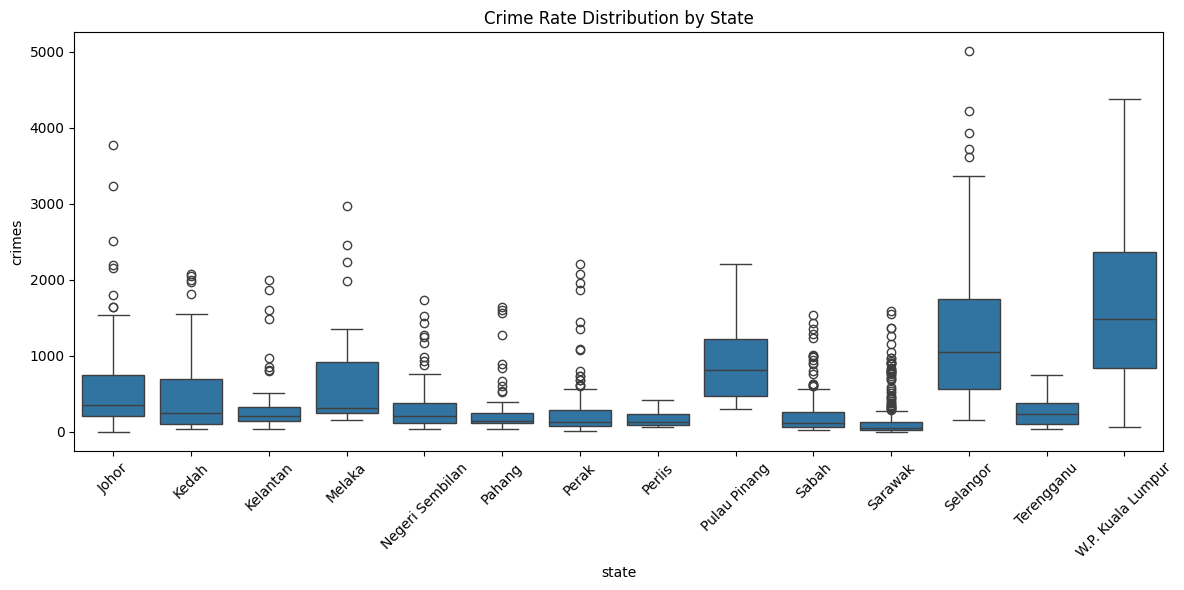

In [34]:
# Boxplot of crime rates by state
plt.figure(figsize=(12, 6))
sns.boxplot(data=district_analysis, x='state', y='crimes')
plt.title('Crime Rate Distribution by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


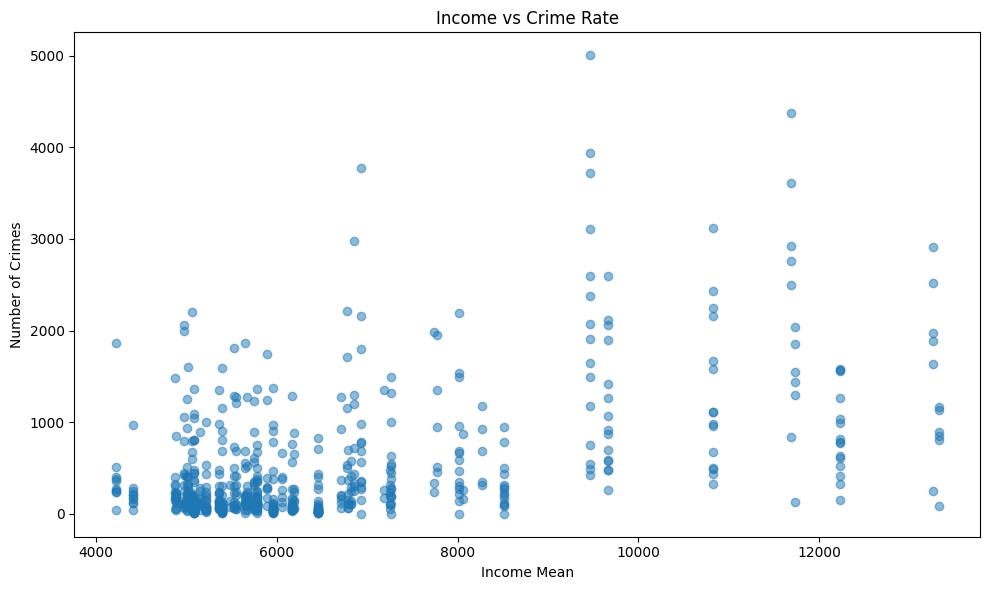

In [35]:
# Scatter plot of income vs crime rate
plt.figure(figsize=(10, 6))
plt.scatter(district_analysis['income_mean'], district_analysis['crimes'], alpha=0.5)
plt.title('Income vs Crime Rate')
plt.xlabel('Income Mean')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

In [36]:
# Analyze crime categories
crime_categories = crime_df.groupby(['type', 'year'])['crimes'].sum().unstack()
print("\nCrime trends by type:")
print(crime_categories.round(2))

# Calculate percentage distribution of crime types
crime_type_dist = crime_df.groupby('type')['crimes'].sum()
crime_type_pct = (crime_type_dist / crime_type_dist.sum() * 100).round(2)
print("\nPercentage distribution of crime types:")
print(crime_type_pct)


Crime trends by type:
year                       2016   2017   2018   2019   2020   2021   2022  \
type                                                                        
break_in                  18760  16201  15742  16497  14040  11352  10585   
causing_injury             5531   5024   4660   4712   4118   4063   3807   
murder                      456    379    323    310    253    243    240   
rape                       1886   1835   1648   1738   1582   1553   1712   
robbery_gang_armed           65     31     31     21      6      5     16   
robbery_gang_unarmed      10907   9779   6543   6058   2992   3071   2432   
robbery_solo_armed           19      3      9      9      5      2      7   
robbery_solo_unarmed       3463   4315   3688   3641   4323   2558   2134   
theft_other               22857  19444  20065  19603  16725  16695  15434   
theft_vehicle_lorry        3050   2102   1761   1549    921    639    718   
theft_vehicle_motorcar    10607   8480   7413   6817 

<Figure size 1200x600 with 0 Axes>

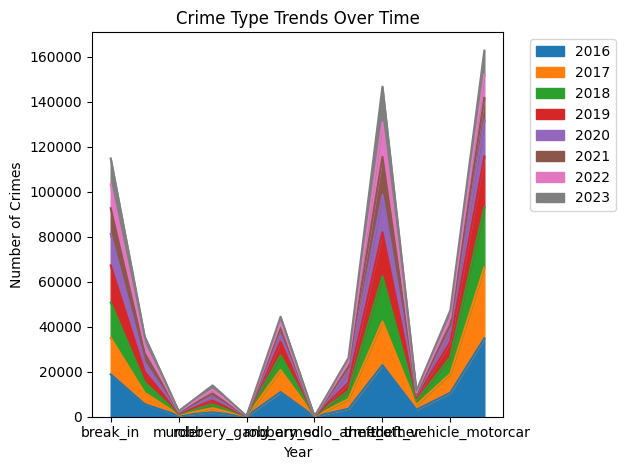

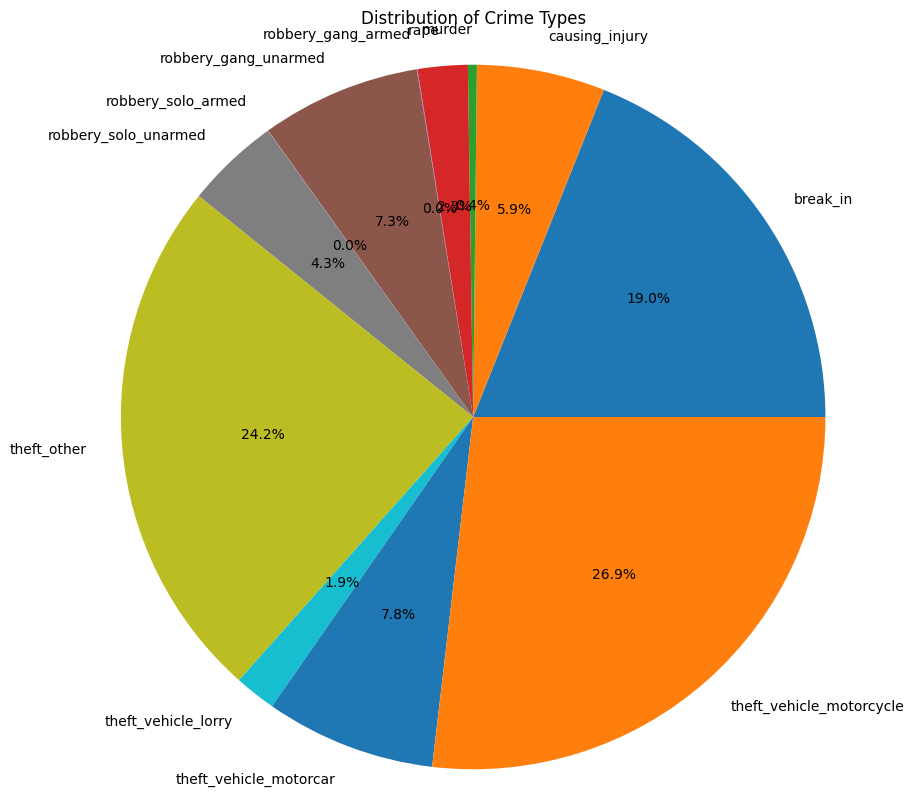

In [37]:
# Stacked area chart of crime types over time
plt.figure(figsize=(12, 6))
crime_categories.plot(kind='area', stacked=True)
plt.title('Crime Type Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Pie chart of crime type distribution
plt.figure(figsize=(10, 10))
plt.pie(crime_type_pct, labels=crime_type_pct.index, autopct='%1.1f%%')
plt.title('Distribution of Crime Types')
plt.axis('equal')
plt.show()

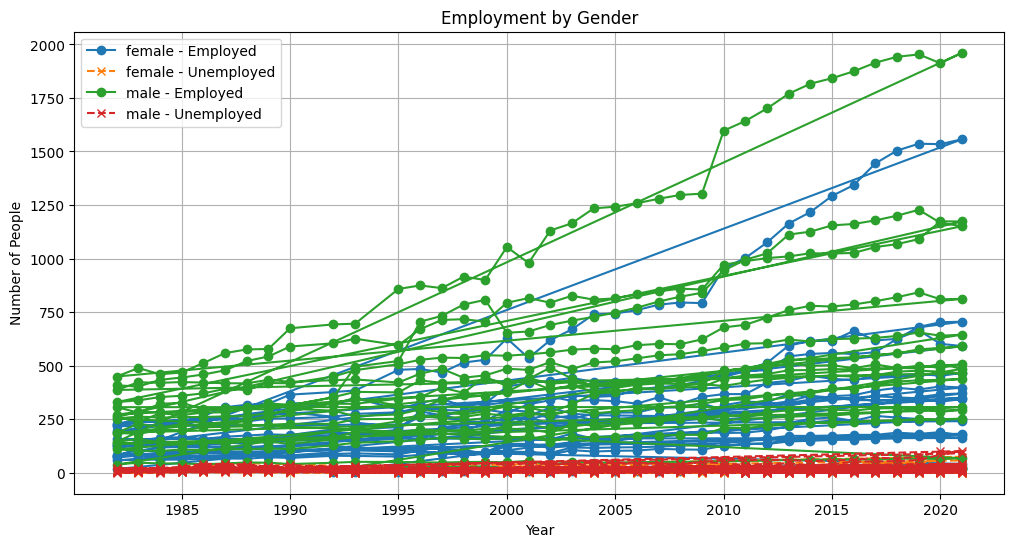

In [51]:
# 6. Gender Employment Analysis
gender_employment = labor_df.pivot_table(
    index='year',
    columns='sex',
    values=['lf_employed', 'lf_unemployed']
)

plt.figure(figsize=(12, 6))
for gender in labor_df['sex'].unique():
    if gender != 'both':  # Skip the 'both' category if it exists
        data = labor_df[labor_df['sex'] == gender]
        plt.plot(data['year'], data['lf_employed'], 
                marker='o', label=f'{gender} - Employed')
        plt.plot(data['year'], data['lf_unemployed'], 
                marker='x', linestyle='--', label=f'{gender} - Unemployed')

plt.title('Employment by Gender')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.savefig('../results/gender_employment.png')
plt.show()
plt.close()

In [52]:
print("All images have been generated and saved to the 'results' directory.")

All images have been generated and saved to the 'results' directory.
